# Cleaning and Analyzing Employee Exit Surveys
In this project,  we'll work with exit surveys from employees of the [Department of Education, Training and Employment (DETE)](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).<br><br>
In this project, our aim is combine the results of both surveys to answer the  following question:<br><br>
<b>Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer? </b>
### Below is a preview of a couple columns we'll work with from the dete_survey.csv: <br>

- ID: An id used to identify the participant of the survey <br>
- SeparationType: The reason why the person's employment ended <br>
- Cease Date: The year or month the person's employment ended<br>
- DETE Start Date: The year the person began employment with the DETE <br>

### Below is a preview of a couple columns we'll work with from the tafe_survey.csv:<br>

- Record ID: An id used to identify the participant of the survey<br>
- Reason for ceasing employment: The reason why the person's employment ended<br>
- LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)<br>



Let's read the datasets into Pandas DataFrames:

In [1]:
import pandas as pd
import numpy as np

In [2]:
dete_survey=pd.read_csv("dete_survey.csv")
tafe_survey=pd.read_csv("tafe_survey.csv")

Let's explore these two dataframes:

In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [4]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [5]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

First, it is clear that the dataset has a huge number of columns (56 columns), which makes analyzing the dataset harder. <br>
We notice as well that there are many columns where null values makes the most of their values, including "Business Unit", "Classification, "Aboriginal", "Torres Strait", "South Sea", "Disability" and "NESB" columns. <br>
We also notice that the dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.

In [6]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [7]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [8]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

It is clear that it is the same case in this dataset; there are around 72 columns, many of them are common with the first dataset but have different column names. Many of the columns as well contain a lot of null values. <br>
It becomes clear that it is crucial to clean the datasets and prepare them to be able to use them for further analysis. 

Let's first handle the issue of "Not Stated" values:

In [9]:
dete_survey=pd.read_csv("dete_survey.csv",na_values=["Not Stated"])
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Next, let's drop  some columns from each dataframe that we won't use in our analysis to make the dataframes easier to work with:

In [10]:
dete_survey_updated=dete_survey.drop(dete_survey.columns[28:49],axis=1)
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

In [11]:
tafe_survey_updated=tafe_survey.drop(tafe_survey.columns[17:66],axis=1)
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
Record ID                                                                    702 non-null float64
Institute                                                                    702 non-null object
WorkArea                                                                     702 non-null object
CESSATION YEAR                                                               695 non-null float64
Reason for ceasing employment                                                701 non-null object
Contributing Factors. Career Move - Public Sector                            437 non-null object
Contributing Factors. Career Move - Private Sector                           437 non-null object
Contributing Factors. Career Move - Self-employment                          437 non-null object
Contributing Factors. Ill Health                                             437 non-null object
Contributing Factors

Now let's turn our attention to the columns' names. Since we need to combine the two datasets, we need to standardize the columns names: <br>

In [12]:
dete_survey_updated.columns=dete_survey_updated.columns.str.lower().str.replace(" ","_").str.strip()
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

Let's rename the columns in the tafe survey to match the columns of the dete survey:

In [13]:
dict={'Record ID': 'id','CESSATION YEAR': 'cease_date','Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender','CurrentAge. Current Age': 'age','Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position','LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated.rename(dict,axis=1,inplace=True)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

Now let's check the "separationtype" column in both dataset:

In [14]:
dete_survey_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [15]:
tafe_survey_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

# Filtering out the Data

Now we will select only the data for survey respondents who have a Resignation separation type:

First, let's update the resignation fields to be easily filtered out:

In [16]:
dete_survey_updated["separationtype"]=dete_survey_updated["separationtype"].str.split("-").str[0]
dete_survey_updated["separationtype"].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

Now we can select the data for survey respondents who have a Resignation separation type:

In [17]:
dete_resignations=dete_survey_updated[dete_survey_updated["separationtype"]=="Resignation"].copy()
tafe_resignations=tafe_survey_updated[tafe_survey_updated["separationtype"]=="Resignation"].copy()

In [18]:
 dete_resignations["separationtype"].value_counts()

Resignation    311
Name: separationtype, dtype: int64

In [19]:
 tafe_resignations["separationtype"].value_counts()

Resignation    340
Name: separationtype, dtype: int64

Now, before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies.<br>
Let's start by verifying that the years in the "cease_date" and "dete_start_date" columns make sense.

First, clean the cease_date column in dete_resignations: <br>
Let's start by extracting the years:

In [20]:
dete_resignations["cease_date"].value_counts(dropna=False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
NaN         11
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
09/2010      1
07/2012      1
2010         1
Name: cease_date, dtype: int64

In [21]:
dete_resignations["cease_date"]=dete_resignations["cease_date"].str.replace("[0-9][0-9]/","").astype(float)
dete_resignations["cease_date"].value_counts(dropna=False).sort_index(ascending=False)

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
NaN        11
Name: cease_date, dtype: int64

Let's check the dete_start_date column:

In [22]:
dete_resignations["dete_start_date"].value_counts(dropna=False).sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
NaN       28
Name: dete_start_date, dtype: int64

The dates in both columns seem to be reasonable, as there are now cease dates earlier than 2006, and the earliest start date was in 1963. We can now proceed to check the years in the second dataset:

In [23]:
tafe_resignations["cease_date"].value_counts(dropna=False).sort_index(ascending=False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
NaN         5
Name: cease_date, dtype: int64

The cease dates seem to be reasonable as well in this dataset, as the earliest cease date is 2009. <br>
To identify any values that look wrong, we will plot a box plot for each case:

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

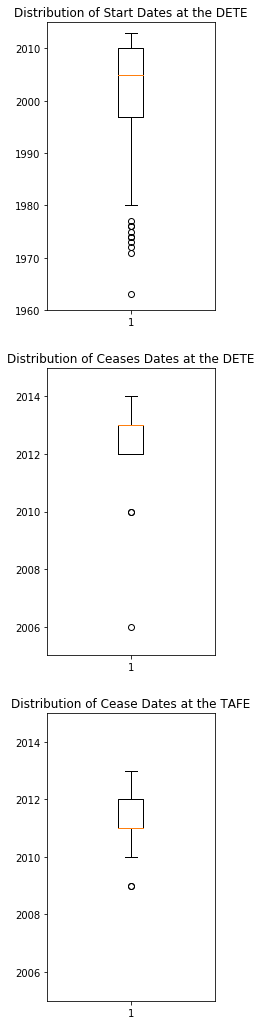

In [25]:
fig = plt.figure(figsize=(3, 18))
ax1=fig.add_subplot(3,1,1)
ax1.boxplot(dete_resignations["dete_start_date"].dropna().astype(int).tolist())
ax1.set_title("Distribution of Start Dates at the DETE")
ax1.set_ylim(bottom=1960,top=2015)
ax2=fig.add_subplot(3,1,2)
ax2.boxplot(dete_resignations["cease_date"].dropna().astype(int).tolist())
ax2.set_title("Distribution of Ceases Dates at the DETE")
ax2.set_ylim(bottom=2005,top=2015)
ax3=fig.add_subplot(3,1,3)
ax3.boxplot(tafe_resignations["cease_date"].dropna().astype(int).tolist())
ax3.set_title("Distribution of Cease Dates at the TAFE")
ax3.set_ylim(bottom=2005,top=2015)
plt.show()

The years in both dataframes don't completely align. The tafe_survey_updated dataframe contains some cease dates in 2009, but the dete_survey_updated dataframe does not. The tafe_survey_updated dataframe also contains many more cease dates in 2010 than the dete_survey_updaed dataframe. Since we aren't concerned with analyzing the results by year, we'll leave them as is.

# Working with Years of Service column

In order to analyze both surveys together, we will have to create a corresponding institute_service column in dete_resignations, since the tafe_resignations dataframe already contains a "service" column, which we renamed to institute_service.

In [26]:
dete_resignations["institute_service"]=dete_resignations["cease_date"]-dete_resignations["dete_start_date"]
dete_resignations["institute_service"]

3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
12     14.0
14      5.0
16      NaN
20     30.0
21     32.0
22     15.0
23     39.0
25     17.0
27      7.0
33      9.0
34      6.0
37      1.0
39      NaN
40     35.0
41     38.0
42      1.0
43     36.0
48      3.0
50      3.0
51     19.0
55      4.0
57      9.0
61      1.0
69      6.0
71      1.0
       ... 
747     6.0
751     8.0
752    15.0
753     9.0
755     1.0
762     0.0
766     7.0
769     5.0
770     NaN
771    12.0
774     NaN
784     0.0
786    20.0
788     NaN
789    31.0
790     6.0
791     NaN
794     NaN
797     NaN
798     NaN
802     NaN
803    10.0
804     6.0
806     8.0
807     9.0
808     3.0
815     2.0
816     2.0
819     5.0
821     NaN
Name: institute_service, Length: 311, dtype: float64

# Identifying employees who resigned because of dissatisfaction

Next, we'll identify any employees who resigned because they were dissatisfied.<br>
Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe. <br>
- tafe_survey_updated: <br>
    - Contributing Factors. Dissatisfaction
    - Contributing Factors. Job Dissatisfaction
- dafe_survey_updated:
    - job_dissatisfaction
    - dissatisfaction_with_the_department
    - physical_work_environment
    - lack_of_recognition
    - lack_of_job_security
    - work_location
    - employment_conditions
    - work_life_balance
    - workload


Let's first convert the values in the 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' columns in the tafe_resignations dataframe to a new column "dissatisfied" containing True, False, or NaN values.

In [27]:
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [28]:
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [29]:
def update_col(element):
    if element=="-":
        return False
    elif pd.isnull(element):
        return np.nan
    else:
        return True
tafe_resignations["dissatisfied"]=tafe_resignations[["Contributing Factors. Dissatisfaction","Contributing Factors. Job Dissatisfaction"]].applymap(update_col).any(axis=1,skipna=False)
tafe_resignations["dissatisfied"].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

Now, we can infer that the new "dissatisfied" column will contain just the following values:<br>
- True: indicates a person resigned because they were dissatisfied with the job
- False: indicates a person resigned because of a reason other than dissatisfaction with the job
- NaN: indicates the value is missing

Next let's convert the values in the dete_resignations dataframe to a new column "dissatisfied" containing True, False, or NaN values:

In [30]:
dete_resignations["dissatisfied"]=dete_resignations[["job_dissatisfaction","dissatisfaction_with_the_department","physical_work_environment","lack_of_recognition","lack_of_job_security","work_location", "employment_conditions","work_life_balance","workload"]].any(axis=1,skipna=False)
dete_resignations["dissatisfied"].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [31]:
tafe_resignations_up = tafe_resignations.copy()
dete_resignations_up=dete_resignations.copy()

# Combining the Two Datasets

In [32]:
dete_resignations_up["institute"]="DETE"
tafe_resignations_up["institute"]="TAFE"
combined=pd.concat([dete_resignations_up,tafe_resignations_up])
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 53 columns):
Contributing Factors. Career Move - Private Sector     332 non-null object
Contributing Factors. Career Move - Public Sector      332 non-null object
Contributing Factors. Career Move - Self-employment    332 non-null object
Contributing Factors. Dissatisfaction                  332 non-null object
Contributing Factors. Ill Health                       332 non-null object
Contributing Factors. Interpersonal Conflict           332 non-null object
Contributing Factors. Job Dissatisfaction              332 non-null object
Contributing Factors. Maternity/Family                 332 non-null object
Contributing Factors. NONE                             332 non-null object
Contributing Factors. Other                            332 non-null object
Contributing Factors. Study                            332 non-null object
Contributing Factors. Travel                           332 non-null ob

c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


Let's check the number of null values in each column:

In [33]:
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
career_move_to_public_sector                           311
employment_conditions                                  311
work_location                                          311
lack_of_job_security                                   311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    3

Next, let's drop any columns with less than 500 non null values:

In [34]:
combined_updated=combined.dropna(axis=1,thresh=500)
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 10 columns):
age                  596 non-null object
cease_date           635 non-null float64
dissatisfied         643 non-null object
employment_status    597 non-null object
gender               592 non-null object
id                   651 non-null float64
institute            651 non-null object
institute_service    563 non-null object
position             598 non-null object
separationtype       651 non-null object
dtypes: float64(2), object(8)
memory usage: 35.6+ KB


# Cleaning the institute_service column
Let's check the different values in the institute_service column:

In [35]:
combined_updated["institute_service"].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
21.0                   3
39.0                   3
30.0                   2
25.0                   2
26.0                   2
28.0                   2
36.0                   2


Let's categorize the values in the institute_service column using the definitions:
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company <br>
Our analysis is based on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

In [36]:
combined_updated["institute_service_up"]=combined_updated["institute_service"].astype(str).str.extract(r"(\d+)").copy()
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float').copy()

combined_updated["institute_service_up"].value_counts(dropna=False)

c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
22.0      6
10.0      6
17.0      6
14.0      6
12.0      6
16.0      5
18.0      5
24.0      4
23.0      4
21.0      3
39.0      3
32.0      3
19.0      3
36.0      2
30.0      2
25.0      2
26.0      2
28.0      2
42.0      1
29.0      1
35.0      1
27.0      1
41.0      1
49.0      1
38.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

Next, we will map each year value to one of the career stages above:

In [37]:
def cat_col(x):
    if pd.isnull(x):
        return np.nan
    elif x<3:
        return "New"
    elif 3<=x<=6:
        return "Experienced"
    elif 7<=x<=10:
        return "Established"
    else:
        return "Veteran"
combined_updated["service_cat"]=combined_updated["institute_service_up"].apply(cat_col).copy()
combined_updated["service_cat"].value_counts(dropna=False)

c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

# Performing Initial Analysis

First, we will fill in missing values in the "dissatisfied" column with the most common value in the column:

In [38]:
combined_updated["dissatisfied"].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

We will fill the missing values with False values:

In [39]:
combined_updated["dissatisfied"]=combined_updated["dissatisfied"].fillna(False).copy()
combined_updated["dissatisfied"].value_counts(dropna=False)

c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


False    411
True     240
Name: dissatisfied, dtype: int64

Next, let's calculate the percentage of dissatisfied employees in each service_cat group: <br>
Since a True value is considered to be 1, calculating the mean will also calculate the percentage of dissatisfied employees.

In [40]:
diss_perc=combined_updated.pivot_table(index="service_cat",values="dissatisfied")*100
diss_perc

,dissatisfied
service_cat,
Established,51.612903
Experienced,34.302326
New,29.533679
Veteran,48.529412


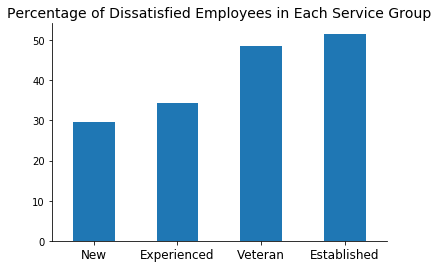

In [41]:
ax=diss_perc.sort_values(by="dissatisfied").plot(kind="bar")
ax.legend().remove()
plt.xticks(rotation=0,fontsize=12)
ax.set_title("Percentage of Dissatisfied Employees in Each Service Group",fontsize=14)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlabel("")
plt.show()

We notice that the employees who resigned from the "New" service group because they werre dissatisfied is the lowest among the four service groups. In fact, as the service years increase, the percentage of resigning employees because of dissatisfaction increases reaching around 50% of the resigning employees. 

# Cleaning age Column

Let's first investigate the attributes in the age columns:

In [42]:
combined_updated["age"].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
26  30           32
31  35           32
36  40           32
56 or older      29
21-25            29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

let's clean the age groups values:

In [43]:
combined_updated["age_up"]=combined_updated["age"].str.replace("  ","-").str.replace("(61 or older)|(56-60)","56 or older")
combined_updated["age_up"].value_counts(dropna=False).sort_index()

c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


20 or younger    10
21-25            62
26-30            67
31-35            61
36-40            73
41-45            93
46-50            81
51-55            71
56 or older      78
NaN              55
Name: age_up, dtype: int64

Let's investigate the attributes with null values in the age column:

In [44]:
combined_updated[combined_updated["age"].isnull()]

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype,institute_service_up,service_cat,age_up
214,NaN,2012.0,False,Permanent Part-time,Female,2.150000e+02,DETE,13,School Administrative Staff,Resignation,13.0,Veteran,NaN
285,NaN,2012.0,False,Permanent Full-time,Female,2.860000e+02,DETE,0,Cleaner,Resignation,0.0,New,NaN
405,NaN,2012.0,False,NaN,NaN,4.060000e+02,DETE,NaN,Teacher,Resignation,NaN,NaN,NaN
802,NaN,2013.0,False,Permanent Part-time,NaN,8.040000e+02,DETE,NaN,Teacher Aide,Resignation,NaN,NaN,NaN
821,NaN,2013.0,False,NaN,NaN,8.230000e+02,DETE,NaN,Teacher Aide,Resignation,NaN,NaN,NaN
3,NaN,2010.0,False,NaN,NaN,6.341399e+17,TAFE,NaN,NaN,Resignation,NaN,NaN,NaN
16,NaN,2010.0,False,NaN,NaN,6.341770e+17,TAFE,NaN,NaN,Resignation,NaN,NaN,NaN
18,NaN,2010.0,False,NaN,NaN,6.341779e+17,TAFE,NaN,NaN,Resignation,NaN,NaN,NaN
19,NaN,2010.0,False,NaN,NaN,6.341820e+17,TAFE,NaN,NaN,Resignation,NaN,NaN,NaN
20,NaN,2010.0,True,NaN,NaN,6.341821e+17,TAFE,NaN,NaN,Resignation,NaN,NaN,NaN


Let's use a heatmap to visualize the null values:

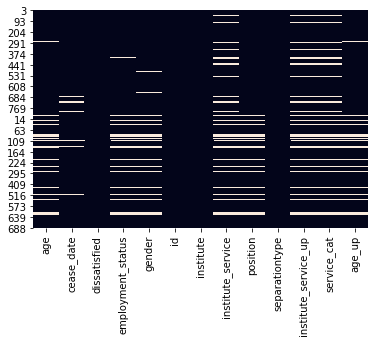

In [45]:
import seaborn as sns
sns.heatmap(combined_updated.isnull(),cbar=False)
plt.show()

Let's check the percentage of null values in the age column:

In [46]:
(combined_updated["age_up"].isnull().sum()/combined_updated.shape[0])*100

8.448540706605224

Since only around 8% of the values are null, then we can safely discard these values in our analysis:

In [47]:
combined_updated.dropna(inplace=True)
combined_updated["age_up"].value_counts(dropna=False)

c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


41-45            89
46-50            72
51-55            67
36-40            66
56 or older      65
26-30            63
31-35            60
21-25            59
20 or younger    10
Name: age_up, dtype: int64

# Analysing the Age Column

Next, let's calculate the percentage of dissatisfied employees in each age group: <br>
Since a True value is considered to be 1, calculating the mean will also calculate the percentage of dissatisfied employees.

In [48]:
diss_age_perc=combined_updated.pivot_table(index="age_up",values="dissatisfied").sort_values(by="dissatisfied")*100
diss_age_perc

,dissatisfied
age_up,
20 or younger,20.000000
21-25,28.813559
36-40,36.363636
31-35,38.333333
41-45,39.325843
46-50,40.277778
51-55,40.298507
26-30,41.269841
56 or older,41.538462


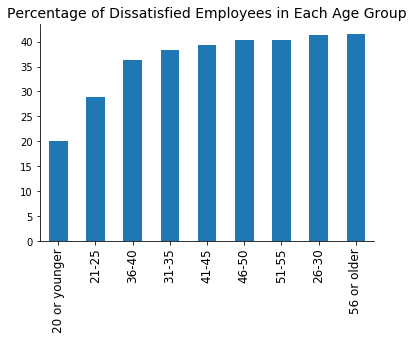

In [49]:
ax=diss_age_perc.sort_values(by="dissatisfied").plot(kind="bar")
ax.legend().remove()
plt.xticks(fontsize=12)
ax.set_title("Percentage of Dissatisfied Employees in Each Age Group",fontsize=14)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlabel("")
plt.show()

We notice that the percentage of employees in the 20 or younger age group who resigned because they were dissatisfied is the lowest among the age groups. In fact, as the age increases, the percentage of resigning employees because of dissatisfaction increases reaching around 41% of the resigning employees for the 65 or older age group.